# Red Wine Exploratory Data Analysis + Quality Prediction Modeling

In [357]:
## importing pandas and sklearn tools
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## importing red wine data
df = pd.read_csv('winequality-red.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [340]:
## getting statistical info on df
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Analyzing Correlations and Visualizing Data

<AxesSubplot:>

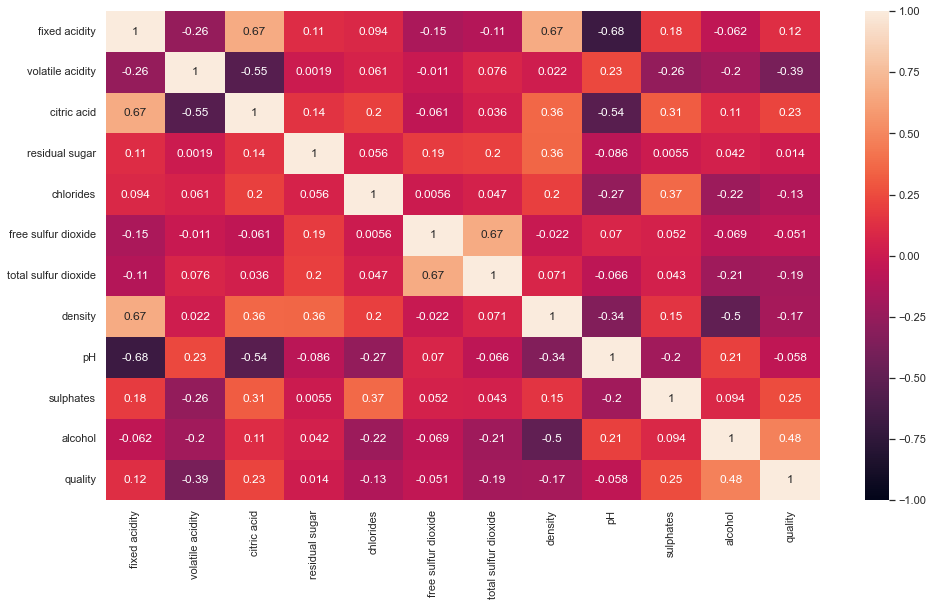

In [341]:
## using sns heatmap to analyze correlations
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [342]:
## ranking correlations of features with quality
df.corr()['quality'].sort_values(ascending=False)[1:]

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Text(0.5, 1.0, 'Relationship between alcohol and Wine Quality')

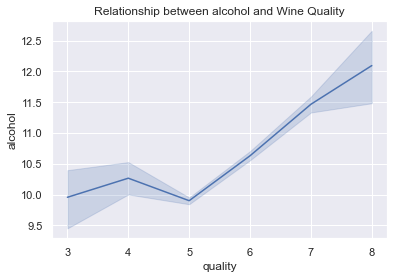

In [343]:
## plotting relationhip between alcohol and quality (strongest positive quality correlation)
sns.lineplot(data = df, x="quality", y="alcohol")
plt.title('Relationship between alcohol and Wine Quality')

Text(0.5, 1.0, 'Distribution of Alcohol % over Range of Wine Quality')

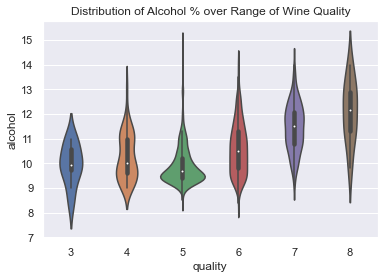

In [344]:
## plotting relationhip between alcohol and quality (strongest positive quality correlation)
sns.violinplot(data = df, x='quality', y='alcohol')
plt.title('Distribution of Alcohol % over Range of Wine Quality')

From the violin plot, we can see that the distribution of alcohol % for lower quality wine is lower than the distribution of alcohol % for higher quality wine. This makes sense in the context of the heatmap and line plot above above, as the two variables have a moderate positive relationship with a correlation of 0.48 (the strongest positive correlation between quality and any other column). This indicates that higher quality wines generally have higher alcohol % levels. 

What is interesting about the line plot is that alcohol % dips as quality rises from 40 -> 50, and proceeds to rise from there. 

Text(0.5, 1.0, 'Relationship between alcohol and Wine Quality')

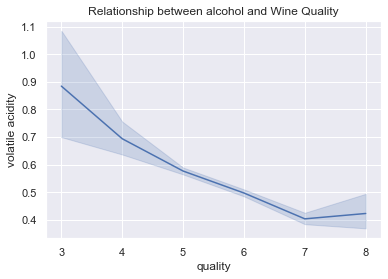

In [345]:
## plotting relationhip between quality and volatile acidity (strongest negative quality correlation)
sns.lineplot(data = df, x="quality", y="volatile acidity")
plt.title('Relationship between alcohol and Wine Quality')

This line plot shows us the negative correlation between quality and volatile acidity, and also indicates that there is a wider distribution of volatile acidity among the lower quality wines.

Text(0.5, 1.0, 'Distribution of Volatile Acidity over Range of Wine Quality')

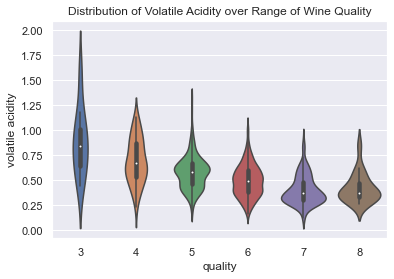

In [346]:
## plotting relationhip between quality and volatile acidity (strongest negative quality correlation)
sns.violinplot(data = df, x='quality', y='volatile acidity')
plt.title('Distribution of Volatile Acidity over Range of Wine Quality')

While the previous violin plot analyzed the distribution of the strongest positive correlation between wine quality and a feature (alcohol), this plot serves to illustrate the distribution of the strongest negative correlation between quality and another variable, which happens to be volatile densite. 

As quality increases, the distribution of volatile acidity becomes less broad, narrowing down to lower levels -- which agrees with the information in the line plot above. This information, combined with the moderate negative correlation of -0.39 between wine the two variables and the line plot above, indicates that higher quality wines generally have lower volatile acidity.

Text(0.5, 1.0, 'Relationship between Sulphates and Wine Quality')

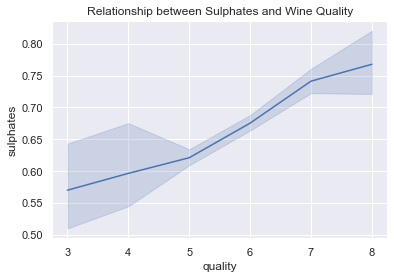

In [347]:
## plotting relationhip between sulphates and quality (second strongest positive quality correlation)
sns.lineplot(data = df, x="quality", y="sulphates")
plt.title('Relationship between Sulphates and Wine Quality')

This line plot shows us the positive correlation between quality and sulphates in red wine, the second highest positive correlation between a feature and quality.

Text(0.5, 1.0, 'Sulphate Distribution across Wine Quality')

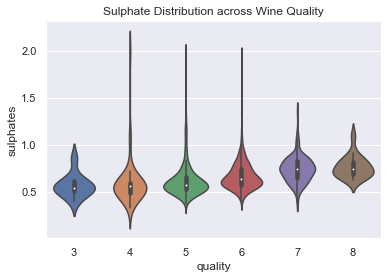

In [348]:
## plotting relationhip between sulphates and quality (second strongest positive quality correlation)
sns.violinplot(data = df, x="quality", y="sulphates")
plt.title('Sulphate Distribution across Wine Quality')

The violin plot confirms our knowledge from the line plot and correlation between sulphates and quality, but also shows us that there are potential outliers in the 40-60 quality range with relatively high sulphates that may skew the relationship between the feature and quality of wine.

## Model Building

In [349]:
## multiplying quality x10 (scored out of 80 instead of 8) for a more accurate and clear mean absolute error
df['quality'] = df['quality'] * 10
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,50
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,50
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,50
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,60
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,50


In [350]:
## setting features as X
X = df.iloc[:, 0:-1]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [351]:
## setting target (quality/100) as y
y = df.iloc[:, -1]
y

0       50
1       50
2       50
3       60
4       50
        ..
1594    50
1595    60
1596    60
1597    50
1598    60
Name: quality, Length: 1599, dtype: int64

In [ ]:
## creating lists to store mean absolute error values and accuracy scores for each model to compare at the end
mae_values = {}
acc_scores = {}

## creating a function to add the MAE and accuracy score of each model to the lists
def accuracy_tracker(mae, acc): 
    mae_values.append(mae)
    mae_values.append(acc)

### Decision Tree Model

In [352]:
## splitting features and target data into training and testing sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=47)
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
val_X = sc.transform(val_X)

## creating decision tree model and fitting the training data
first_model = DecisionTreeClassifier(random_state=1)
first_model.fit(train_X, train_y)

## making validation predictions and calculating mean absolute error
val_predictions = first_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

## getting accuracy of model
dtc_acc = accuracy_score(val_y, val_predictions)
print(f"Accuracy Score is {dtc_acc}")

Validation MAE: 5
Accuracy Score is 0.62


Now, I will attempt to decrease the MAE and build a more accurate model by looping through various possibilities for the # of leaf nodes on the maximum depth of the decision tree and checking which # results in the lowest MAE and the most accurate predictions using the validation data. 

In [353]:
## creating a function that gets the mean absolute error for a specified "max_lead_nodes" parameter
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=47)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [354]:
## writing for loop to find optimal MAE for different max leaf nodes
p = {}
l = []
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    my_mae = get_mae(i, train_X, val_X, train_y, val_y)
    p[my_mae] =i
    l.append(my_mae)

## storing the optimal max_leaf nodes
best_tree_size = p[min(l)]
print(f"Optimal Max Tree Nodes: {best_tree_size}")
print(f"Mean Absolute Error: {min(l)}")

Optimal Max Tree Nodes: 70
Mean Absolute Error: 4.45


In [355]:
## building a final decision tree that takes the optimal of max tree nodes for a smaller mean absolute error
final_model = DecisionTreeClassifier(max_leaf_nodes=best_tree_size, random_state=47)
final_model.fit(train_X, train_y)

val_new_preds = final_model.predict(val_X)
val_mae = mean_absolute_error(val_new_preds, val_y)

print(f"Final Validation Mean Absolute Error: {val_mae}")

## getting accuracy of model
dtc_final_acc = accuracy_score(val_y, val_new_preds)
print(f"Accuracy Score is {dtc_final_acc}")

Final Validation Mean Absolute Error: 4.45
Accuracy Score is 0.625


By optimizing the the max_tree_nodes parameter through looping across the different numbers (of nodes at lowest depth) and calculating the minimum MEA, the final validation mean absolute error was brought down to 4.675 from 5 and the accuracy went from 62% to 62.5%.

### Random Forests Model

In [356]:
## building a random forests model with the training and testing data 
forest_model = RandomForestClassifier(random_state=47)
forest_model.fit(train_X, train_y)

## predicting using the validation features and calculating mean absolute error of the model
forest_preds = forest_model.predict(val_X)
print(f"Random Forests MAE: {mean_absolute_error(val_y, forest_preds)}")

## getting accuracy of model
forest_acc = accuracy_score(val_y, forest_preds)
print(f"Accuracy Score is {forest_acc}")

Random Forests MAE: 3.525
Accuracy Score is 0.69


The Random Forests Model makes more accurate predictions on wine quality than the Decision Tree Model.